In [1]:
import sub.QUEST as qu
import sub.analysis as an
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#換算係数
pf17cz8 = 0.0067579231215604664e+4#G/kA
pf17cz4 = 0.007826195334585322e+4
pf17cz0 = 0.008171716583792687e+4

pf26cz8 = 0.01951789751848346e+4
pf26cz4 = 0.016786434513453928e+4
pf26cz0 = 0.015386161969249744e+4

decdaq = 1.3e-3 #V/G

DecDaqからホール素子信号を取得

In [3]:
size = qu.readDecDaq01(27207, 1000)

In [4]:
time = size[0][1:23352]
ch16 = (size[1][16][1:23352]-np.mean(size[1][16][25000:26000]))/decdaq
ch17 = (size[1][17][1:23352]-np.mean(size[1][17][25000:26000]))/decdaq
ch18 = (size[1][18][1:23352]-np.mean(size[1][18][25000:26000]))/decdaq
ch19 = -(size[1][19][1:23352]-np.mean(size[1][19][25000:26000]))/decdaq
ch20 = -(size[1][20][1:23352]-np.mean(size[1][20][25000:26000]))/decdaq

コイル由来の磁場を取得

In [5]:
df0 = pd.read_csv('27207.txt')
df1 = df0[['time', 'TFCkA', 'PlasmaCurrentkA', 'PF17kA', 'PF26kA']]
df1.columns = ['time', 'tfc', 'ip', 'pf17', 'pf26']

In [6]:
df1 = df1[df1['time']>=0.0]

In [7]:
cz800fc = df1['pf17']*pf17cz8 + df1['pf26']*pf26cz8
cz400fc = df1['pf17']*pf17cz4 + df1['pf26']*pf26cz4
cz000fc = df1['pf17']*pf17cz0 + df1['pf26']*pf26cz0

In [8]:
cz800fc = an.wave_resampling_freq(df1['time'],cz800fc,1000,kind='linear')
cz400fc = an.wave_resampling_freq(df1['time'],cz400fc,1000,kind='linear')
cz000fc = an.wave_resampling_freq(df1['time'],cz000fc,1000,kind='linear')

プラズマ由来の磁場を算出

In [9]:
czp800fp = ch16 - cz800fc[1]
czp400fp = ch17 - cz400fc[1]
cz000fp = ch18 - cz000fc[1]
czm400fp = ch19 - cz400fc[1]
czm800fp = ch20 - cz800fc[1]

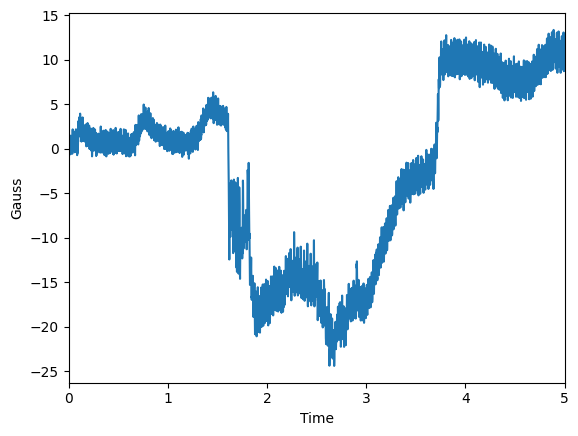

In [10]:
plt.figure()
plt.xlabel('Time')
plt.plot(time, czp800fp)
plt.ylabel('Gauss')
plt.xlim(0,5)
plt.show()

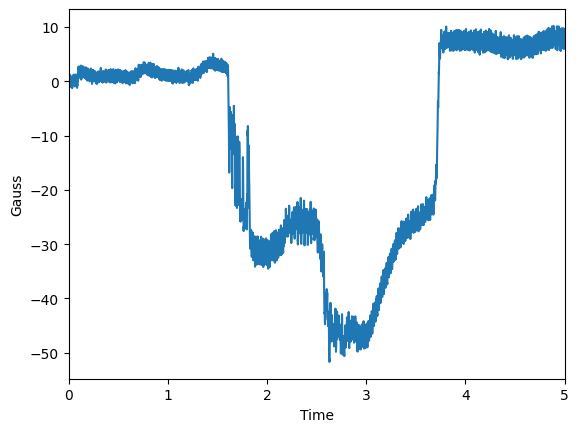

In [11]:
plt.figure()
plt.xlabel('Time')
plt.plot(time, czp400fp)
plt.ylabel('Gauss')
plt.xlim(0,5)
plt.show()

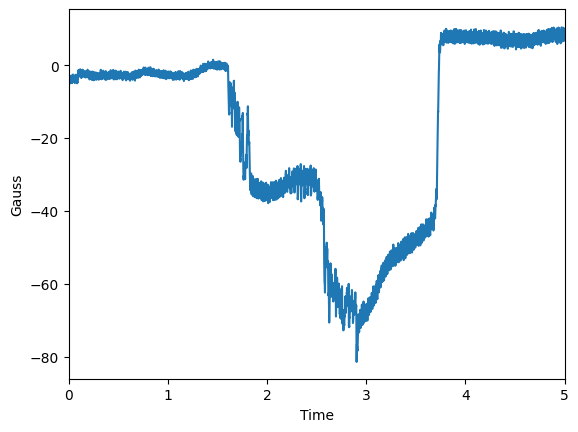

In [12]:
plt.figure()
plt.xlabel('Time')
plt.plot(time, cz000fp)
plt.ylabel('Gauss')
plt.xlim(0,5)
plt.show()

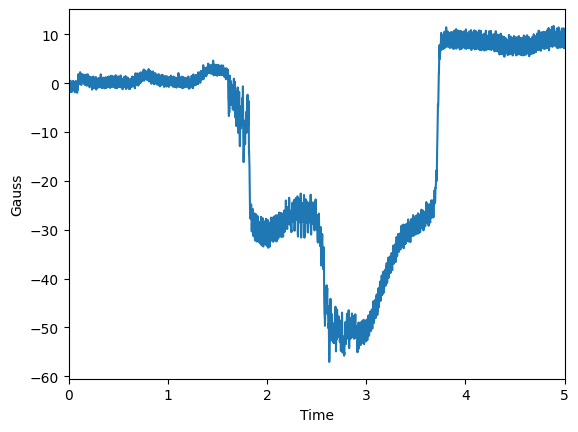

In [13]:
plt.figure()
plt.xlabel('Time')
plt.plot(time, czm400fp)
plt.ylabel('Gauss')
plt.xlim(0,5)
plt.show()

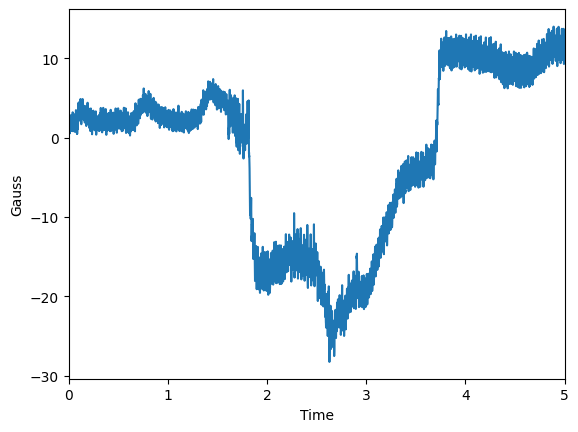

In [14]:
plt.figure()
plt.xlabel('Time')
plt.plot(time, czm800fp)
plt.ylabel('Gauss')
plt.xlim(0,5)
plt.show()

In [15]:
pbz = (czp800fp+czp400fp+cz000fp+czm400fp+czm800fp)

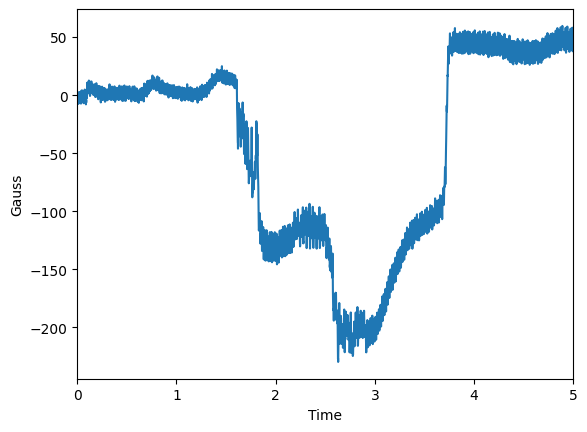

In [16]:
plt.figure()
plt.xlabel('Time')
plt.plot(time, pbz)
plt.ylabel('Gauss')
plt.xlim(0,5)

plt.show()

プラズマ電流との比較

In [17]:
df0 = pd.read_csv('27207.txt')
df1 = df0[['time', 'TFCkA', 'PlasmaCurrentkA', 'PF17kA', 'PF26kA']]
df1.columns = ['time', 'tfc', 'ip', 'pf17', 'pf26']

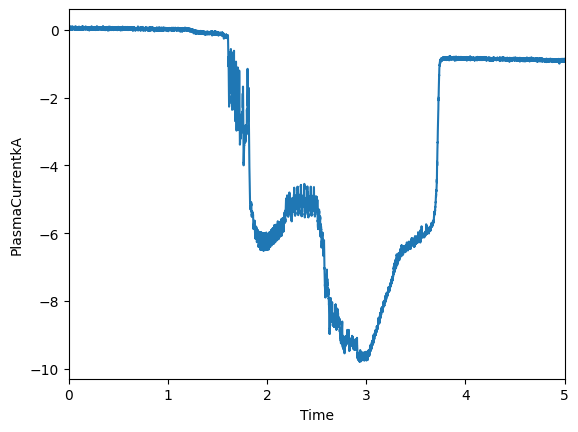

In [18]:
plt.figure()
plt.xlabel('Time')
plt.plot(df1['time'], df1['ip'])
plt.ylabel('PlasmaCurrentkA')
plt.xlim(0,5)

plt.show()